In [ ]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv("./netflix_customer_churn.csv")

# 데이터 기본 정보 요약
print("🔹 데이터 크기:", df.shape)
print("\n🔹 컬럼명:")
print(df.columns.tolist())

print("\n🔹 상위 5개 행:")
display(df.head())

print("\n🔹 결측치 요약:")
print(df.isnull().sum())

print("\n🔹 데이터 타입 정보:")
print(df.dtypes)


🔹 데이터 크기: (5000, 14)

🔹 컬럼명:
['customer_id', 'age', 'gender', 'subscription_type', 'watch_hours', 'last_login_days', 'region', 'device', 'monthly_fee', 'churned', 'payment_method', 'number_of_profiles', 'avg_watch_time_per_day', 'favorite_genre']

🔹 상위 5개 행:


,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action



🔹 결측치 요약:
customer_id               0
age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64

🔹 데이터 타입 정보:
customer_id                object
age                         int64
gender                     object
subscription_type          object
watch_hours               float64
last_login_days             int64
region                     object
device                     object
monthly_fee               float64
churned                     int64
payment_method             object
number_of_profiles          int64
avg_watch_time_per_day    float64
favorite_genre             object
dtype: object


전체 이탈률: 50.30%


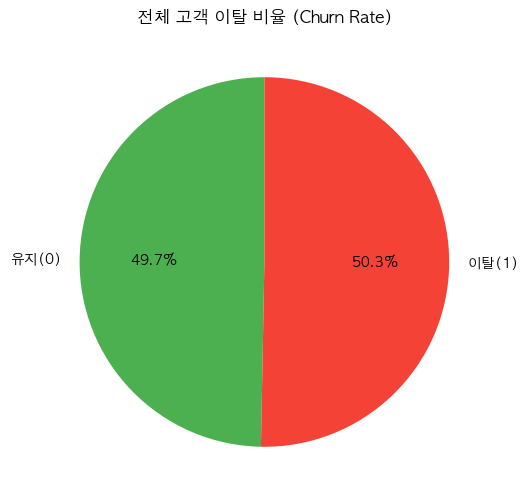

/var/folders/4p/nv9t30nn6dz94nyhv0sllj_00000gn/T/ipykernel_72094/3730894129.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=churn_counts.values, palette=['#4CAF50','#F44336'])


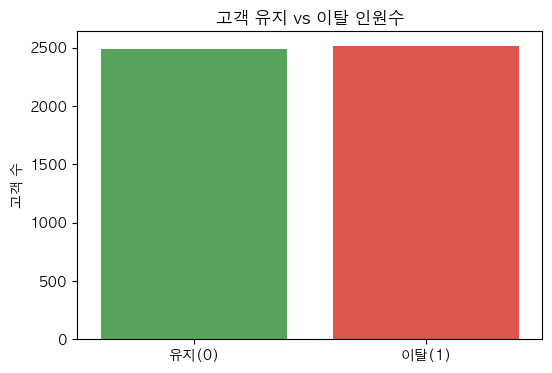

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib 한글 폰트 깨짐 방지 (필요 시)
plt.rcParams['font.family'] = 'Malgun Gothic'  # MAC 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 이탈 여부 분포
churn_counts = df['churned'].value_counts().sort_index()
labels = ['유지(0)', '이탈(1)']

# 비율 계산
churn_rate = df['churned'].mean() * 100

print(f"전체 이탈률: {churn_rate:.2f}%")

# 1. 원형 그래프
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', colors=['#4CAF50','#F44336'], startangle=90)
plt.title('전체 고객 이탈 비율 (Churn Rate)')
plt.show()

# 2. 막대 그래프
plt.figure(figsize=(6,4))
sns.barplot(x=labels, y=churn_counts.values, palette=['#4CAF50','#F44336'])
plt.title('고객 유지 vs 이탈 인원수')
plt.ylabel('고객 수')
plt.show()


이탈률이 50.3%라면, 거의 절반의 고객이 이탈한 상태로 꽤 균형 잡힌 타깃 분포.
머신러닝 학습에도 적합한 데이터 구조.

/var/folders/4p/nv9t30nn6dz94nyhv0sllj_00000gn/T/ipykernel_72094/397232789.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn = df.groupby('age_group')['churned'].mean().reset_index()
/var/folders/4p/nv9t30nn6dz94nyhv0sllj_00000gn/T/ipykernel_72094/397232789.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_churn, x='age_group', y='churned', palette='coolwarm')


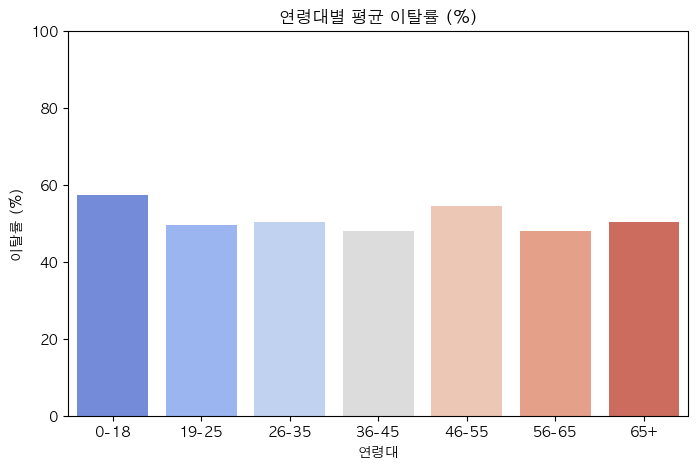

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 새 연령대 구간 정의
bins = [0, 18, 25, 35, 45, 55, 65, 120]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

# 연령대별 평균 이탈률 계산
age_churn = df.groupby('age_group')['churned'].mean().reset_index()
age_churn['churned'] = age_churn['churned'] * 100  # 퍼센트 단위 변환

# 시각화
plt.figure(figsize=(8,5))
sns.barplot(data=age_churn, x='age_group', y='churned', palette='coolwarm')
plt.title('연령대별 평균 이탈률 (%)')
plt.xlabel('연령대')
plt.ylabel('이탈률 (%)')
plt.ylim(0, 100)
plt.show()


0–18세 구간이 가장 높고, 19–35세는 다소 낮으며
46세 이상부터 다시 약간 증가하는 U자형 패턴처럼 보이네요.
실제로 젊은층의 결제 지속성이 낮고 중장년층의 콘텐츠 피로도 등으로 해석 가능.
나름 균등하게 분포

/var/folders/4p/nv9t30nn6dz94nyhv0sllj_00000gn/T/ipykernel_72094/1088231941.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churned', y='watch_hours', palette=['#4CAF50','#F44336'])
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy s

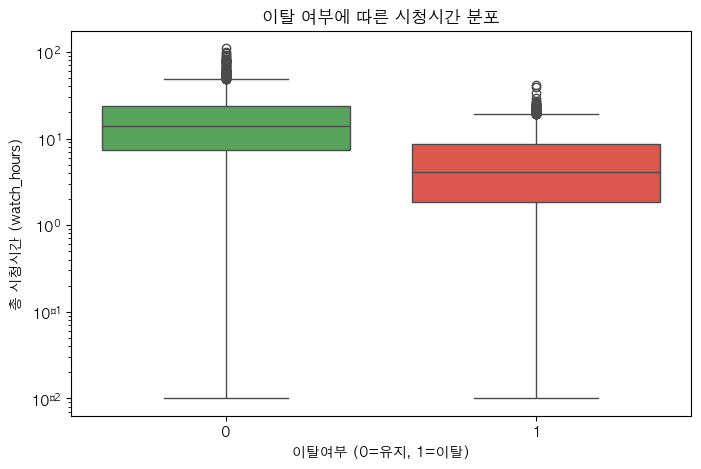

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='churned', y='watch_hours', palette=['#4CAF50','#F44336'])
plt.title('이탈 여부에 따른 시청시간 분포')
plt.xlabel('이탈여부 (0=유지, 1=이탈)')
plt.ylabel('총 시청시간 (watch_hours)')
plt.yscale('log')  # 극단치가 많을 경우 로그 스케일 적용 (선택사항)
plt.show()


왼쪽(초록색, 유지 고객) 의 중앙값이 오른쪽(빨간색, 이탈 고객) 보다 확실히 높음.
시청 시간이 짧을수록 이탈 가능성이 높다로 해석.

/var/folders/4p/nv9t30nn6dz94nyhv0sllj_00000gn/T/ipykernel_72094/1058216935.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='subscription_type', palette='pastel')


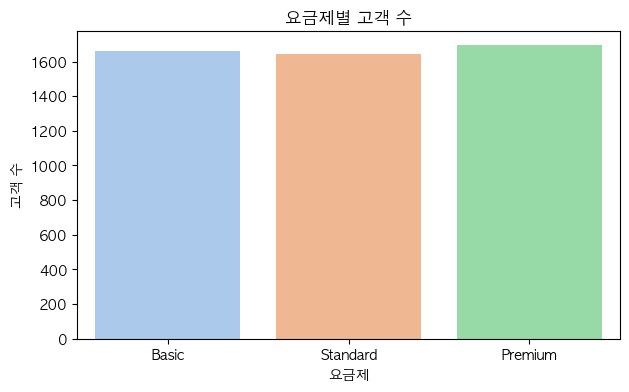

/var/folders/4p/nv9t30nn6dz94nyhv0sllj_00000gn/T/ipykernel_72094/1058216935.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plan_churn, x='subscription_type', y='churned', palette='coolwarm')


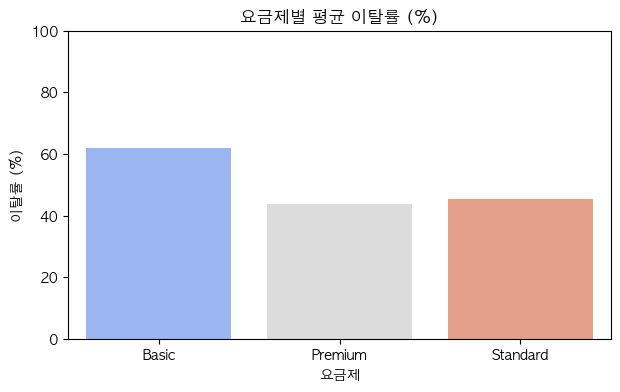

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 요금제별 고객 수
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='subscription_type', palette='pastel')
plt.title('요금제별 고객 수')
plt.xlabel('요금제')
plt.ylabel('고객 수')
plt.show()

# 요금제별 평균 이탈률
plan_churn = df.groupby('subscription_type')['churned'].mean().reset_index()
plan_churn['churned'] = plan_churn['churned'] * 100

plt.figure(figsize=(7,4))
sns.barplot(data=plan_churn, x='subscription_type', y='churned', palette='coolwarm')
plt.title('요금제별 평균 이탈률 (%)')
plt.xlabel('요금제')
plt.ylabel('이탈률 (%)')
plt.ylim(0, 100)
plt.show()


Basic 요금제 이탈률이 약 60%로 가장 높고,
Standard / Premium 요금제는 각각 45% 안팎으로 낮은 편.

저가 요금제(Basic) 고객은 충성도가 낮고, 쉽게 서비스를 떠나는 경향이 있음.
Premium 요금제 고객은 상대적으로 만족도 높거나, 지속 이용 의사가 더 강한 편이라고 해석 가능.

/var/folders/4p/nv9t30nn6dz94nyhv0sllj_00000gn/T/ipykernel_72094/1685329253.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='region', order=df['region'].value_counts().index, palette='pastel')


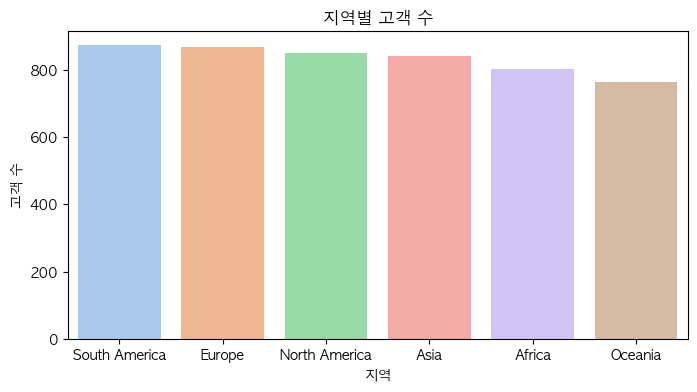

/var/folders/4p/nv9t30nn6dz94nyhv0sllj_00000gn/T/ipykernel_72094/1685329253.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_churn, x='region', y='churned', palette='coolwarm', order=region_churn.sort_values('churned', ascending=False)['region'])


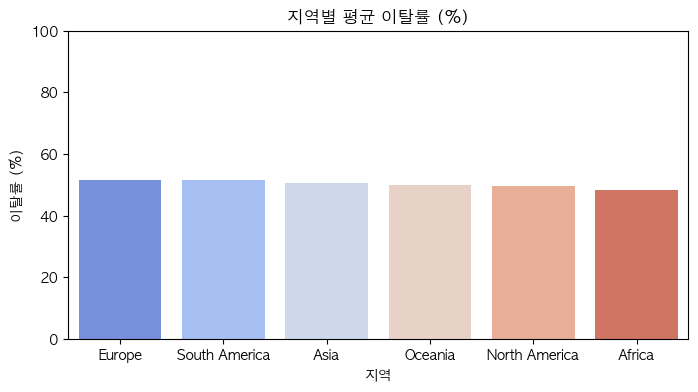

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 지역별 고객 수
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='region', order=df['region'].value_counts().index, palette='pastel')
plt.title('지역별 고객 수')
plt.xlabel('지역')
plt.ylabel('고객 수')
plt.show()

# 지역별 평균 이탈률
region_churn = df.groupby('region')['churned'].mean().reset_index()
region_churn['churned'] = region_churn['churned'] * 100

plt.figure(figsize=(8,4))
sns.barplot(data=region_churn, x='region', y='churned', palette='coolwarm', order=region_churn.sort_values('churned', ascending=False)['region'])
plt.title('지역별 평균 이탈률 (%)')
plt.xlabel('지역')
plt.ylabel('이탈률 (%)')
plt.ylim(0, 100)
plt.show()


South America, Europe, North America, Asia 순으로 많고, Oceania는 상대적으로 적음. 
균등한 샘플 분포.
지역별 이탈률이 모두 약 50% 전후로 유사.
즉, 이탈 요인이 지역별 문화적 요인보다, 요금제·이용행태·시청시간 등 개별적 요인에 더 큰 영향을 받는 의미로 해석 가능.

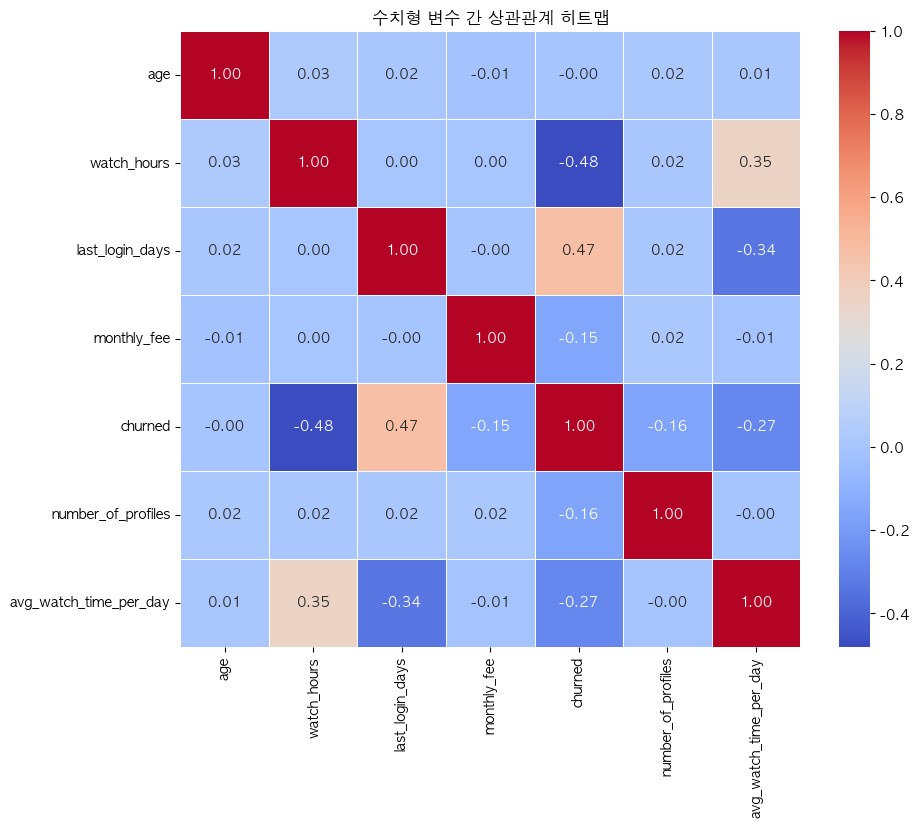

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 변수만 선택
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# 상관계수 계산
corr = numeric_df.corr()

# 히트맵 시각화
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('수치형 변수 간 상관관계 히트맵')
plt.show()


이용 빈도와 시청량이 줄고, 로그인 간격이 길어질수록 이탈 가능성이 급격히 증가한다.
이는 이탈 조기 탐지 모델(Churn Prediction Model) 의 주요 feature 로 바로 활용 가능.